<a href="https://colab.research.google.com/github/mariammur/CS4410/blob/main/Discussion_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
import requests
from textblob import TextBlob
import nltk
import numpy as np 
import pandas as pd 
import seaborn as sns
import random
import re

In [2]:
!pip install requests
import requests
target_url ='https://www.nbcnews.com/news/world/live-blog/russia-ukraine-war-live-updates-zelenskyy-meet-g7-leaders-azovstal-res-rcna27814'
response = requests.get(target_url)
text = response.text

In [3]:
import nltk


In [4]:
blob=TextBlob(text)
blob

TextBlob("<!DOCTYPE html><html lang="en"><head><link href="https://nodeassets.nbcnews.com/_next/static/css/53353b178c8a72f4.css" rel="preload" as="style"/><style>@font-face{font-family:iconfont;src:url(https://nodeassets.nbcnews.com/_next/static/assets/fonts/iconfont.17f6dcc97d.woff2)format("woff2"),url(https://nodeassets.nbcnews.com/_next/static/assets/fonts/iconfont.5950e1148d.woff)format("woff");font-display:swap;}</style><link href="https://nodeassets.nbcnews.com/_next/static/css/53353b178c8a72f4.css" rel="stylesheet"/><link href="https://nodeassets.nbcnews.com/assets/header-footer/1.90.0/news/header.css" rel="stylesheet"/><script>var _HFS = { version: "1.90.0", host: "https://nodeassets.nbcnews.com/assets/header-footer", social: "nbcnews", identity: {"appKey":"nbcnewsweb","options":{"enableIframe":true,"enablePopUp":false,"env":"production"}} }</script><link rel="shortcut icon" type="image/x-icon" href="https://nodeassets.nbcnews.com/cdnassets/projects/ramen/favicon/nbcnews/all-ot

In [5]:
sentences = re.compile('[.!?] ').split(text)

In [6]:
sentences

['<!DOCTYPE html><html lang="en"><head><link href="https://nodeassets.nbcnews.com/_next/static/css/53353b178c8a72f4.css" rel="preload" as="style"/><style>@font-face{font-family:iconfont;src:url(https://nodeassets.nbcnews.com/_next/static/assets/fonts/iconfont.17f6dcc97d.woff2)format("woff2"),url(https://nodeassets.nbcnews.com/_next/static/assets/fonts/iconfont.5950e1148d.woff)format("woff");font-display:swap;}</style><link href="https://nodeassets.nbcnews.com/_next/static/css/53353b178c8a72f4.css" rel="stylesheet"/><link href="https://nodeassets.nbcnews.com/assets/header-footer/1.90.0/news/header.css" rel="stylesheet"/><script>var _HFS = { version: "1.90.0", host: "https://nodeassets.nbcnews.com/assets/header-footer", social: "nbcnews", identity: {"appKey":"nbcnewsweb","options":{"enableIframe":true,"enablePopUp":false,"env":"production"}} }</script><link rel="shortcut icon" type="image/x-icon" href="https://nodeassets.nbcnews.com/cdnassets/projects/ramen/favicon/nbcnews/all-other-size

In [7]:
blob.sentiment


Sentiment(polarity=-0.2908963655369331, subjectivity=0.6915037374223122)

In [8]:
%precision 3


'%.3f'

In [9]:
blob.sentiment.polarity


-0.291

In [10]:
blob.sentiment.subjectivity


0.692

Text(0.5, 6.79999999999999, 'Sentence Polarity')

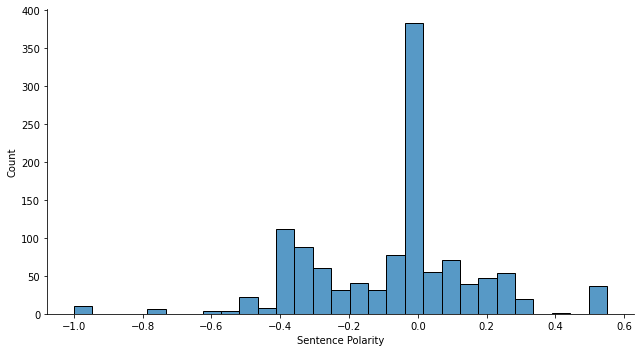

In [11]:
t_sentiment=[]
for s in sentences:
    txt= TextBlob(s)
    a= txt.sentiment.polarity
    b= txt.sentiment.subjectivity
    t_sentiment.append([s,a,b])
df_textblob = pd.DataFrame(t_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity'])

sns.displot(df_textblob["Polarity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Polarity")